In [4]:


# 1) Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2) Load dataset  (file name exactly sameா check பண்ணு)
df = pd.read_csv("fraudTrain.csv")

print(df.shape)
df.head()

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:


df.info()
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Clean column names (IMPORTANT)
df.columns = df.columns.str.strip()

# Print columns to verify
print("Columns:")
print(df.columns)

# Check column exists before using it
if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    print("Date column converted successfully")
else:
    print("Column 'trans_date_trans_time' NOT FOUND")

# Remove unwanted columns safely
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Convert categorical columns safely
cat_cols = ['Geography', 'Gender']
df = pd.get_dummies(df, columns=[c for c in cat_cols if c in df.columns], drop_first=True)

# Split features and target safely
if 'Exited' in df.columns:
    X = df.drop('Exited', axis=1)
    y = df['Exited']
    print("Feature & Target split done")
else:
    print("Target column 'Exited' NOT FOUND")

# Final check
print("\nFinal DataFrame Info:")
print(df.info())

Columns:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Column 'trans_date_trans_time' NOT FOUND
Feature & Target split done

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null

Accuracy: 0.7195


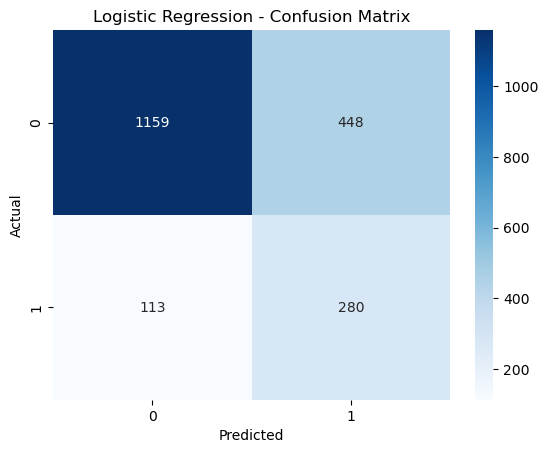

In [16]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# LOAD DATA
df = pd.read_csv("Churn_Modelling.csv")

# DROP USELESS COLUMNS
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# CONVERT CATEGORICAL TO DUMMY
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# SPLIT FEATURES & TARGET
X = df.drop('Exited', axis=1)
y = df['Exited']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC REGRESSION MODEL
log_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# TRAIN MODEL
log_clf.fit(X_train_scaled, y_train)

# PREDICTION
y_pred = log_clf.predict(X_test_scaled)

# ACCURACY
print("Accuracy:", accuracy_score(y_test, y_pred))

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

ROC-AUC: 0.7822693654194197


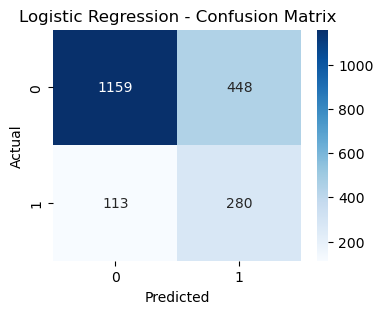

In [17]:



log_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

log_clf.fit(X_train_scaled, y_train)

y_pred_log = log_clf.predict(X_test_scaled)
y_proba_log = log_clf.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(4,3))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.46      0.75      0.57       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000

ROC-AUC: 0.8355318889527528


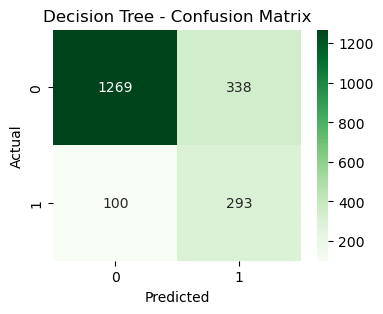

In [18]:


dt_clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.86      0.83      0.84      2000

ROC-AUC: 0.8699962473339447


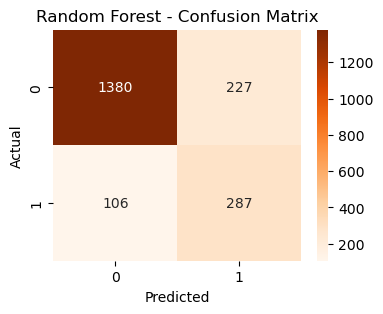

In [19]:


rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=50,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Figure size 600x500 with 0 Axes>

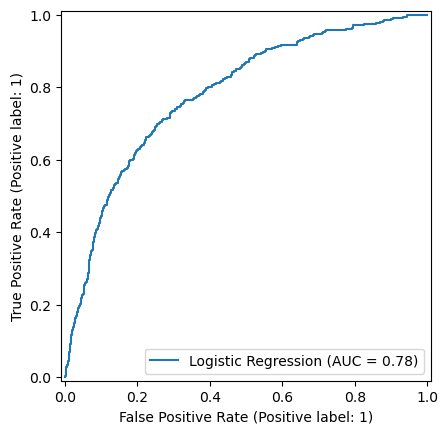

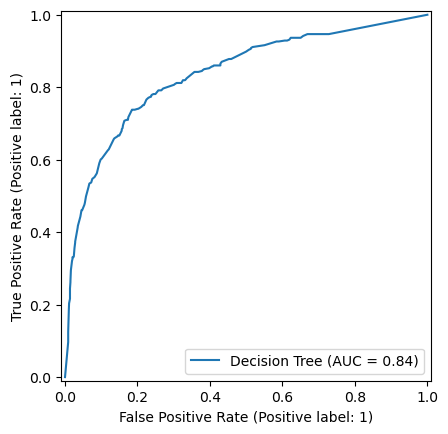

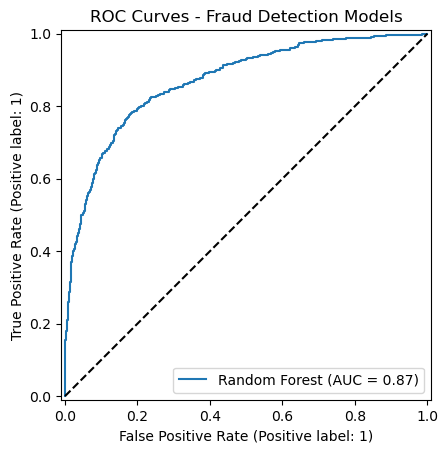

In [20]:


plt.figure(figsize=(6,5))

RocCurveDisplay.from_predictions(
    y_test, y_proba_log, name="Logistic Regression"
)
RocCurveDisplay.from_predictions(
    y_test, y_proba_dt, name="Decision Tree"
)
RocCurveDisplay.from_predictions(
    y_test, y_proba_rf, name="Random Forest"
)

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - Fraud Detection Models")
plt.show()